# Determining Planck's constant from experimental data

By this stage in the experiment, you have determined the minimum wavelength of Bremsstrahlung at 8 different operating voltages AND have an estimate of the uncertainty in each measurement of minimum wavelength. 

By completing the following notebook, you will plot your experimental data (including uncertainties), fit a straight line to your plot and determine Planck's constant from the gradient of that fitted line. The X-ray software you have been using offers you limited facility to do this but it has no scope for including the effects of uncertainty on the final estimate of Planck's constant.

Step 1. Import numpy and pyplot from matplotlib. Also call the command that ensures matplotlib plots happen inline, within the current window.

In [1]:
#you can just run this cell
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Step 2. Enter your experimental measurements into three 1-d numpy arrays; voltages, minLambda and deltaLambda. Make sure each of these 1-d arrays has the same number of entries as each other.

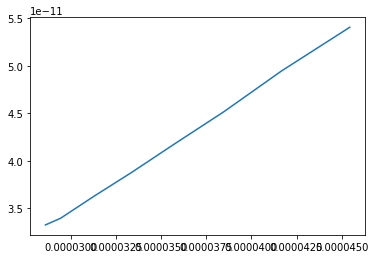

In [26]:
#enter your experimental measurements for voltage in kV
voltages=np.array([35000.,34000.,32000.,30000.,28000.,26000.,24000.,22000.])
#enter your experimental measurements for the minimum wavelength in pm
minLambda=np.array([33.25*1e-12,33.95*1e-12,36.25*1e-12,38.75*1e-12,41.75*1e-12,45.15*1e-12,49.45*1e-12,54.05*1e-12])
#enter your estimate of the uncertainty in the minimum wavelength measurements in pm
deltaLambda=np.array([0.15,0.05,0.05,0.15,0.15,0.05,0.05,0.15])
#Assuming your uncertainty estimates are the 95% confidence interval for a Gaussian distribution (2sigma), 
#the standard deviation is approximately half these values.
sigmaLambda=deltaLambda/2.0


plt.plot(1./voltages,minLambda)

According to the Duane-Hunt relation, $\lambda_{min}$ is proportional to the $\it{reciprocal}$ of the operating voltage of the X-ray apparatus, i.e. $\frac{1}{U}$.

Step 3. Now you are going to fit a polynomial of order 1 to your experimental measurements, 

$\begin{equation*}
\lambda_{min}=m(\frac{1}{U})+b
\end{equation*}
$

and find the values of parameters $m$ and $b$ for the best fitting line. You will weight the $\lambda_{min}$ values according to their uncertainty.

In [27]:
#Fit a polynomial of order 1 (line) and return the fitted parameters and their covariance 
linearParam,covParam=np.polyfit(1./voltages, minLambda,1,w=1./sigmaLambda,cov=True)
print("The line of best fit is given by {:.3e}(1/U)+{:.3e}".format(linearParam[0],linearParam[1]))

The line of best fit is given by 1.255e-06(1/U)+-2.973e-12


In [4]:
print(linearParam)

[1255.10040534   -2.97304146]


In [14]:
linearParam,covParam=np.polyfit(1./(voltages*1e-3), minLambda,1,w=1./sigmaLambda,cov=True)
print(linearParam)
print(covParam)

[ 1.25510041 -2.97304146]
[[ 1.18277367e-04 -4.16981927e-03]
 [-4.16981927e-03  1.50159631e-01]]


The square root of the diagonal elements in the covariance matrix are the standard deviation of the fitted parameters, which is a measure of their uncertainty.

Step 4. Complete the next cell to print out the standard deviation of each of the fitted parameters and record it in your lab book. 

(Hint: The numpy function np.diag() will extract the diagonals of a matrix. The numpy function np.sqrt() will take the square root of all numbers in an array.)

In [6]:
#Calculate the standard deviation from the covariance matrix, covParam.
sdParam=np.sqrt(np.diag(covParam))
#Complete the following print statements
print("The uncertainty in the fitted gradient is {:.3e}".format(sdParam[0]))
print("The uncertainty in the fitted intercept is {:.3e}".format(sdParam[1]))

The uncertainty in the fitted gradient is 1.088e+01
The uncertainty in the fitted intercept is 3.875e-01


According to Duane and Hunt's law,

$
\lambda_{min}=\frac{hc}{e}\cdot(\frac{1}{U})
$

where $c=299792458 (m/s)$, the velocity of light in a vacuum, $e=1.60217662\times 10^{-19}C$, the charge on an electron and $h$ is Planck's constant.

The gradient of your fitted line gives you an estimate of the proportionality factor

$
gradient=\frac{hc}{e}\\
\text{which we can rearrange to estimate }h\\
h=\frac{gradient\cdot e}{c}.$

Step 5. Calculate your estimate of Planck's constant from your line's fitted gradient in the next cell. Remember the gradient of your graph probably has units of $pm\cdot kV$, if you recorded wavelength in $pm$ and voltage in $kV$. So you will want to change units to $m\cdot V$ first.


In [28]:
#Complete to change gradient to have volt.metres
gradient=linearParam[0]
#input the charge on an electron in Coulombs
eCharge=1.60217662e-19
#velocity of light in m/s
cLight=299792458.

h_estimate=gradient*eCharge/cLight
print("h={:.3e}".format(h_estimate))


h=6.708e-34


Step 6. Calculate the uncertainty in your estimate of Planck's constant given the uncertainty in your fitted gradient. Remember the units of your uncertainty for the gradient are also originally in $pm\cdot kV$, so convert them first.
Finally round the result to 1 significant figure and state your estimate of Planck's constant in your lab book.

In [8]:
#complete to change uncertainty in gradient to have units m.V
delta_gradient=sdParam[0]*1e-12*1000.
#Use uncertainty in gradient to calculate uncertainty in h_estimate
delta_h=1.088e+01*eCharge/cLight
print('Uncertainty in h_estimate={}'.format(delta_h))

Uncertainty in h_estimate=5.814583109225516e-27


Step 7. Calculate an array of $\lambda_{min}$ values corresponding to the line of best fit, using numpy's polyval.

In [31]:
#Complete the polyval command
lambda_linFit=np.polyval(linearParam,minLambda)
print(linearParam)
print(minLambda)
print(lambda_linFit)

[ 1.25510041e-06 -2.97304146e-12]
[3.325e-11 3.395e-11 3.625e-11 3.875e-11 4.175e-11 4.515e-11 4.945e-11
 5.405e-11]
[-2.97299973e-12 -2.97299885e-12 -2.97299597e-12 -2.97299283e-12
 -2.97298906e-12 -2.97298480e-12 -2.97297940e-12 -2.97297362e-12]


Step 8. Now let's plot what you've got. 

Plot the experimental data in red using '.' markers, show the uncertainty in black for each measurement and add a label. Plot the line of best fit using green and label it too. Add axes labels and a fitting chart title. Finally add a legend and save it to pdf file.

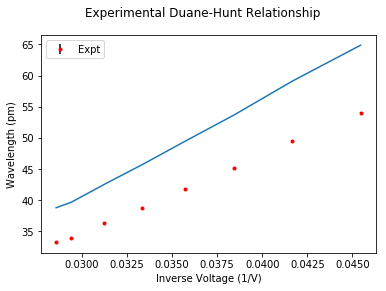

In [10]:
#plot experimental data showing uncertainty as error bars
plt.errorbar(1.0/voltages,minLambda,yerr=deltaLambda,linestyle='none',marker='.',c='r',ecolor='k',label='Expt')
#plot line of best fit data just as a line and add an appropriate label
plt.plot(1./(voltages),lambda_linFit)
#add x axis label    
plt.xlabel('Inverse Voltage (1/V)')
#add y axis label
plt.ylabel ('Wavelength (pm)')
#add appropriate title
plt.suptitle ('Experimental Duane-Hunt Relationship')
#add legend
plt.legend()
#Now set an appropriate file name to save it to file.
plt.savefig("myplot.pdf",dpi=300,orientation="landscape")

Step 9. Now print a hard-copy of the pdf file containing your graph and stick it in your lab book!

In [11]:
np.polyval?

In [12]:
h=m*e/c

NameError: name 'm' is not defined

In [ ]:
1.255e+03*(1.60217662e-19/299792458)

In [ ]:
(1.60217662e-19/299792458)*33.25*35.

In [ ]:
lambda_linFit/minLambda